In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools

import keras
import itertools
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [2]:
data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


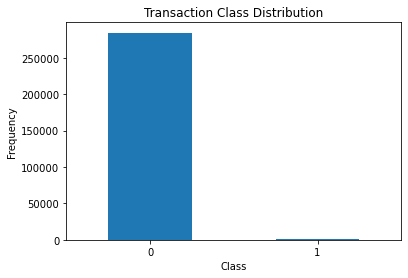

In [3]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2))
plt.xlabel("Class")
plt.ylabel("Frequency");

In [4]:
x_train = data.drop(columns=['Class','Time'])
y_train = data['Class']

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.20)

In [5]:
print(x_train.shape)
print(x_test.shape)

(227845, 29)
(56962, 29)


In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
#    print(name)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9994908886626171
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.93      0.81      0.87       115

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[56840,     7],
       [   22,    93]])

In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9989642217618764
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.83      0.61      0.70       115

    accuracy                           1.00     56962
   macro avg       0.92      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[56833,    14],
       [   45,    70]])